In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
%matplotlib inline

A = np.matrix([	[0.25, 	0, 		0, 		0.25, 	0.25, 	0.25],
			   	[0.25, 	0.25,	0,		0.25,	0.25,	0	],
			   	[0.25,	0,		0,		0.5,	0.25,	0	],
			   	[0.25,	0,		0.5,	0,		0.25,	0	],
			   	[0.25,	0.25,	0,		0.25,	0.25,	0	],
			   	[0.25,	0,		0,		0.25,	0.25,	0.25]])

A = np.transpose(A)#Transition matrixi tersten olusturdum

print("(a)")
print("Transition matrix A:")
print(A)

(a)
Transition matrix A:
[[ 0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.    0.25  0.    0.    0.25  0.  ]
 [ 0.    0.    0.    0.5   0.    0.  ]
 [ 0.25  0.25  0.5   0.    0.25  0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.25  0.    0.    0.    0.    0.25]]


In [96]:
L, B = np.linalg.eig(A)

idx = L.argsort()[::-1]   
L = L[idx]
B = B[:,idx]

B_inv = np.linalg.inv(B)
S = B * np.linalg.matrix_power(np.diag(L),100) * B_inv

P = S[:,0]

print("(b)")
print("Stationary distribution of A: ")
print(np.real(P))

epsilon = 1e-8
isUniform = True
for i in range(5):
	if np.abs(P[i]-P[i+1]) > epsilon:
		isUniform = False
print("")
if not isUniform:
	print("This stationary distribution is NOT a uniform distribution")
else:
	print("This stationary distribution is a uniform distribution")

(b)
Stationary distribution of A: 
[[ 0.25      ]
 [ 0.08333333]
 [ 0.11111111]
 [ 0.22222222]
 [ 0.25      ]
 [ 0.08333333]]

This stationary distribution is NOT a uniform distribution


In [97]:
isBalanced = True
for i in range(6):
	for j in range(6):
		LtR = A[i,j] * P[j]
		RtL = A[j,i] * P[i]
		if np.abs(LtR-RtL) > epsilon:
			isBalanced = False

print("(c)")
if not isBalanced:
	print("This process does NOT satisfy the detailed balance condition")
else:
	print("This process satisfies the detailed balance condition")

(c)
This process does NOT satisfy the detailed balance condition


(d)
Tmix =  26

(e)   A,       A^2,      A^5,     A^10,     A^100


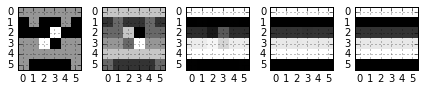

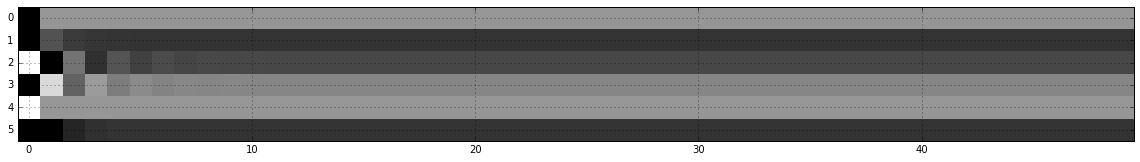

From the figure above, we can see that around T=10 the distribution starts to stabilize.
With epsilon 1e-8 Tmix came out to be 26


In [138]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

#Pi0 = np.matrix([[1.0/6],[1.0/6],[1.0/6],[1.0/6],[1.0/6],[1.0/6]])
Pi0 = np.matrix([[0],[0],[0.5],[0],[0.5],[0]]);
diff = 1
t = 0
Tmix = 0
TmixFound = 0
Sequence = []
Sequence.append(Pi0)
while t < 100:
    t += 1
    A_t = np.linalg.matrix_power(A,t)
    Pi = A_t * Pi0
    if t<50:
        Sequence.append(Pi)
    diff = np.linalg.norm(P - Pi, 2)
    if diff <= epsilon and not(TmixFound):
        Tmix = t
        TmixFound = 1
    if t==1:
        ax1.set_title('A')
        ax1.imshow(A_t, interpolation='nearest', cmap = cm.Greys_r)
        ax1.grid(True)
    elif t==2:
        ax2.set_title('A^2')
        ax2.imshow(A_t, interpolation='nearest', cmap = cm.Greys_r)
        ax2.grid(True)
    elif t==5:
        ax3.set_title('A^5')
        ax3.imshow(A_t, interpolation='nearest', cmap = cm.Greys_r)
        ax3.grid(True)
    elif t==10:
        ax4.set_title('A^10')
        ax4.imshow(A_t, interpolation='nearest', cmap = cm.Greys_r)
        ax4.grid(True)
    elif t==100:
        ax5.set_title('A^100')
        ax5.imshow(A_t, interpolation='nearest', cmap = cm.Greys_r)
        ax5.grid(True)
    
print("(d)")
print("Tmix = ",Tmix)
print("")
print("(e)   A,       A^2,      A^5,     A^10,     A^100")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

plt.figure(num=None, figsize=(20, 10), dpi=50, facecolor='w', edgecolor='k')
plt.plot()
plt.imshow(np.squeeze(np.asarray(np.transpose(Sequence))), interpolation='nearest', cmap = cm.Greys_r)
plt.grid(True)
plt.show()
print("From the figure above, we can see that around T=10 the distribution starts to stabilize.")
print("With epsilon 1e-8 Tmix came out to be", Tmix)

(f)


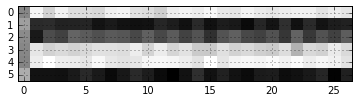

In [102]:
###  f
N = 1000
Trajectories = []

for i in range(N):
	Xs = []
	X = np.random.randint(6)
	Xs.append(X)
	for t in range(Tmix):
		Arr = np.random.multinomial(1, np.squeeze(np.asarray(A[:,X])))
		X = (Arr==1).argmax()
		Xs.append(X)
	Trajectories.append(Xs)

Histogram = np.zeros((6,Tmix + 1))
for i in range(N):
	for t in range(Tmix + 1):
		Histogram[Trajectories[i][t]][t] += 1. / N

print("(f)")
plt.imshow(Histogram, interpolation='nearest', cmap = cm.Greys_r)
plt.grid(True)
plt.show()

(g)

Histogram of 1000     Stationary 
Dependent Samples     Distribution


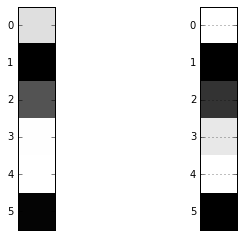

In [100]:
###   g
SingleTraj = []
X = np.random.randint(6)
for t in range(Tmix + N):
	Arr = np.random.multinomial(1, np.squeeze(np.asarray(A[:,X])))
	X = (Arr==1).argmax()
	if t > Tmix:
		SingleTraj.append(X)

SingleHist = np.zeros((6,1))
for t in range(N-1):
	SingleHist[SingleTraj[t]] += 1. / N
    
fig, (ax1, ax2) = plt.subplots(1,2)

print("(g)")
print()
print("Histogram of 1000     Stationary ")
print("Dependent Samples     Distribution")
ax1.imshow(SingleHist, interpolation='nearest', cmap = cm.Greys_r)
ax2.imshow(np.real(P), interpolation='nearest', cmap = cm.Greys_r)
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
plt.grid(True)
plt.show()